# Svalbard Global Seed Vault
Here's the [website](http://www.nordgen.org/index.php/en/content/view/full/1400)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# seed deposit events data
# file is actually tab-delimited, not xls, so open with read_table() instead of read_excel()

# This pulls the data from the Seed Vault website
deposits = pd.read_table('http://www.nordgen.org/sgsv/download.php?file=/scope/sgsv/files/sgsv_by_deposit_date.xls', header=0)

In [3]:
deposits.head(3)

,sgsv_by_deposit_date_id,institute_code,deposit_date,depositor_name,institute_acronym,accessions,seeds,seed_boxes,taxa,species,genus,countries,continents
0,739972,ARM035,2012-03-01,"Armenian State Agrarian University, Laboratory...",LPGPB,175,87500.0,1,22,21,4,1,1
1,739973,AUS006,2014-02-25,"Australian Medicago Genetic Resources Centre, ...",SARDI,2926,1085800.0,3,57,43,1,65,6
2,739974,AUS165,2011-02-16,Australian Grains Genebank,AGG,343,35438.0,1,2,2,2,6,1


## Top 10 Seed Depositors

In [4]:
# create new dataset with depositors' totals
totals = deposits.groupby("depositor_name", as_index=False).sum()

In [5]:
# the top 10 depositors with the most seeds
most = totals.sort_values(by="seeds", ascending=False).head(10)
most

,depositor_name,sgsv_by_deposit_date_id,accessions,seeds,seed_boxes,taxa,species,genus,countries,continents
30,International Crop Research Institute for the ...,6660342,110818,229616519.0,300,74,74,68,845,53
29,International Centre for Agricultural Research...,5920988,131644,67748730.0,378,1212,875,112,705,46
33,International Rice Research Institute,2960394,122060,61562149.0,182,111,95,13,351,24
14,Centro Internacional de Mejoramiento de Maíz y...,4440363,158218,46571720.0,461,60,39,25,320,29
45,National Plant Germplasm System,5181134,108022,39230572.0,303,3067,2703,890,976,42
13,Centro Internacional de Agricultura Tropical,7400035,54664,22305850.0,161,2158,2150,528,803,60
34,Leibniz Institute of Plant Genetics and Crop P...,5180126,48653,20852449.0,78,7300,4349,1695,692,42
52,Plant Gene Resources of Canada,2959974,25868,18344293.0,167,476,428,199,310,24
49,Nordic Genetic Resource Center,5920924,21123,10299952.0,46,863,729,445,218,46
39,National Agricultural Research Organization,1480283,777,8994623.0,3,14,14,5,4,4


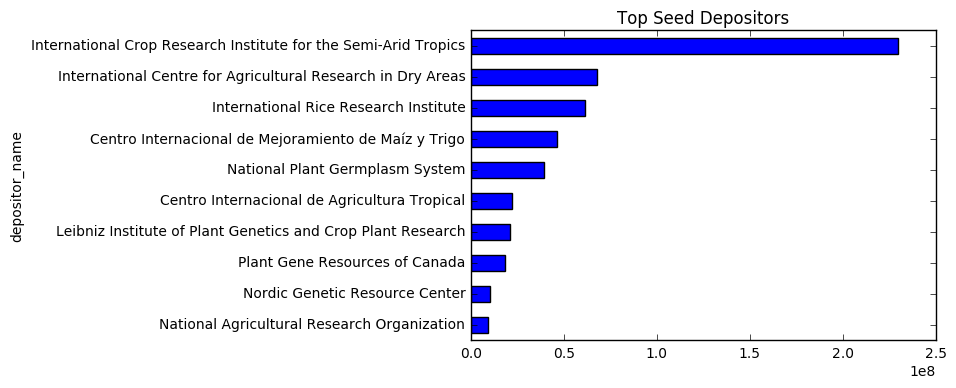

In [6]:
most.sort_values(by="seeds", ascending=True).plot(x="depositor_name", y="seeds", kind="barh", title="Top Seed Depositors", legend=False);